In [17]:
import pandas as pd
import numpy as np
import code.dirty_completeness as dc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

df_adult = pd.read_csv('datasets/adult.csv')
df_list_adult = dc.injection(df_adult, 1, 'adult', 'income')

saved adult-completeness50%
saved adult-completeness60%
saved adult-completeness70%
saved adult-completeness80%
saved adult-completeness90%


In [4]:
df_list_adult[4].head(10)

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,42.0,Self-emp-not-inc,99185.0,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,NaN,United-States,>50K
1,55.0,Private,163083.0,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
2,49.0,Private,340755.0,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,NaN,Private,208881.0,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
4,19.0,Private,271446.0,Some-college,10.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,25.0,United-States,<=50K
5,44.0,Private,167005.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,48.0,United-States,>50K
6,33.0,Private,36539.0,Bachelors,NaN,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,>50K
7,48.0,Private,NaN,HS-grad,9.0,Divorced,Transport-moving,Not-in-family,White,Male,0.0,0.0,65.0,United-States,<=50K
8,NaN,Private,24872.0,Some-college,10.0,Separated,Transport-moving,NaN,Amer-Indian-Eskimo,Female,0.0,0.0,30.0,United-States,<=50K
9,38.0,Private,173968.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,NaN,Male,0.0,0.0,45.0,United-States,<=50K


#### here we discovered that education and education-num are perfectly correlated

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

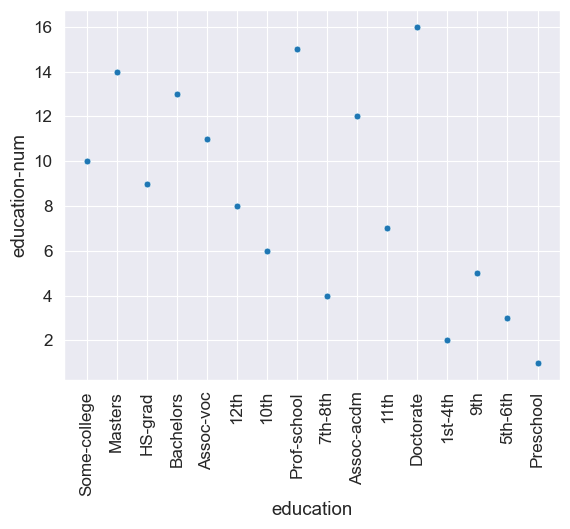

In [5]:
sns.scatterplot(df_list_adult[4][['education', 'education-num']], x='education', y='education-num')
plt.xticks(rotation=90)

In [6]:
df_list_adult[4].nunique()

age                  68
workclass             6
fnlwgt             2595
education            16
education-num        16
maritial-status       7
occupation           13
relationship          6
race                  5
sex                   2
capital-gain         58
capital-loss         37
hours-per-week       73
native-country       38
income                2
dtype: int64

In [20]:
categorical = ['workclass', 'education', 'maritial-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
integer = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
columns = categorical + integer

## Simple Imputation

In [22]:
# imputate integer values using the median
df_integer = df_list_adult[4][integer].copy()

simple_imputer = SimpleImputer(missing_values=np.NaN, strategy='median') #define the imputer model
adult_integer_imp = simple_imputer.fit_transform(df_integer) # returns numpy array
df_integer_imputed = pd.DataFrame(adult_integer_imp, columns=integer)
df_integer_imputed.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,42.0,99185.0,10.0,0.0,0.0,40.0
1,55.0,163083.0,14.0,0.0,0.0,40.0
2,49.0,340755.0,14.0,0.0,0.0,40.0
3,38.0,208881.0,10.0,0.0,0.0,40.0
4,19.0,271446.0,10.0,0.0,0.0,25.0
5,44.0,167005.0,9.0,0.0,0.0,48.0
6,33.0,36539.0,10.0,0.0,0.0,40.0
7,48.0,180667.0,9.0,0.0,0.0,65.0
8,38.0,24872.0,10.0,0.0,0.0,30.0
9,38.0,173968.0,9.0,0.0,0.0,45.0


In [24]:
df_cat = df_list_adult[4][categorical].copy()
df_cat.head(10)

simple_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent') #define the imputer model
adult_categorical_imp = simple_imputer.fit_transform(df_cat) # returns numpy array
df_categorical_imputed = pd.DataFrame(adult_categorical_imp, columns=categorical)
df_categorical_imputed.head(10)

,workclass,education,maritial-status,occupation,relationship,race,sex,native-country
0,Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
2,Private,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
4,Private,Some-college,Never-married,Other-service,Own-child,White,Female,United-States
5,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6,Private,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
7,Private,HS-grad,Divorced,Transport-moving,Not-in-family,White,Male,United-States
8,Private,Some-college,Separated,Transport-moving,Husband,Amer-Indian-Eskimo,Female,United-States
9,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


### Final imputed DataFrame

In [27]:
df = pd.concat([df_integer_imputed, df_categorical_imputed], axis=1)

df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,maritial-status,occupation,relationship,race,sex,native-country
0,42.0,99185.0,10.0,0.0,0.0,40.0,Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,55.0,163083.0,14.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
2,49.0,340755.0,14.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States
3,38.0,208881.0,10.0,0.0,0.0,40.0,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
4,19.0,271446.0,10.0,0.0,0.0,25.0,Private,Some-college,Never-married,Other-service,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,37.0,160910.0,13.0,7298.0,0.0,40.0,Local-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
3013,30.0,488720.0,5.0,0.0,0.0,40.0,Private,9th,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,United-States
3014,37.0,180667.0,10.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
3015,34.0,225548.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Protective-serv,Husband,Black,Male,United-States


In [28]:
df.isnull().sum()

age                0
fnlwgt             0
education-num      0
capital-gain       0
capital-loss       0
hours-per-week     0
workclass          0
education          0
maritial-status    0
occupation         0
relationship       0
race               0
sex                0
native-country     0
dtype: int64